In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

max_features=10000
maxlen=500
batch_size=32
(train_data,train_labels),(test_data,
                           test_labels)=imdb.load_data(num_words=max_features)
train_data=sequence.pad_sequences(train_data,maxlen=maxlen)
test_data=sequence.pad_sequences(test_data,maxlen=maxlen)

In [3]:
print(train_data.shape,train_labels.shape)
print(test_data.shape)
print(train_data[2])
print(train_labels[2])

(25000, 500) (25000,)
(25000, 500)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0  

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense

model=Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
history=model.fit(train_data,train_labels,
                  epochs=10,batch_size=batch_size,validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 77s 121ms/step - loss: 0.6556 - accuracy: 0.5984 - val_loss: 0.6352 - val_accuracy: 0.6318
Epoch 2/10
625/625 [==============================] - 75s 119ms/step - loss: 0.4676 - accuracy: 0.7830 - val_loss: 0.5004 - val_accuracy: 0.7626
Epoch 3/10
625/625 [==============================] - 74s 118ms/step - loss: 0.3602 - accuracy: 0.8438 - val_loss: 0.5706 - val_accuracy: 0.7196
Epoch 4/10
625/625 [==============================] - 76s 121ms/step - loss: 0.2328 - accuracy: 0.9103 - val_loss: 0.5809 - val_accuracy: 0.7558
Epoch 5/10
625/625 [==============================] - 74s 118ms/step - loss: 0.1460 - accuracy: 0.9481 - val_loss: 0.6674 - val_accuracy: 0.7500
Epoch 6/10
625/625 [==============================] - 74s 119ms/step - loss: 0.0856 - accuracy: 0.9725 - val_loss: 0.6715 - val_accuracy: 0.7984
Epoch 7/10
625/625 [==============================] - 78s 124ms/step - loss: 0.1075 - accuracy: 0.9635 - val_loss: 0.7305 - val_ac

In [ ]:
results=model.evaluate(test_data,test_labels)
print("Test Loss:",results[0])
print("Test Accuracy:",results[1])

782/782 [==============================] - 18s 22ms/step - loss: 0.8344 - accuracy: 0.6454
Test Loss: 0.8344276547431946
Test Accuracy: 0.6453999876976013


In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

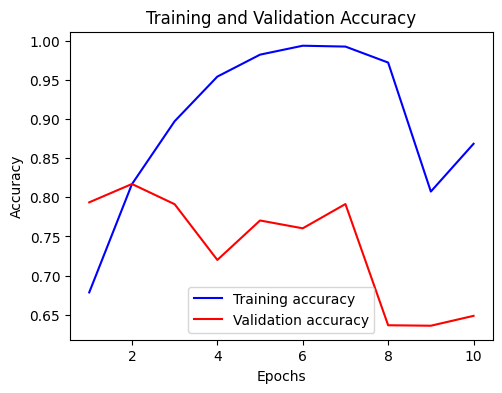

In [ ]:
epochs = range(1, len(train_acc) + 1)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

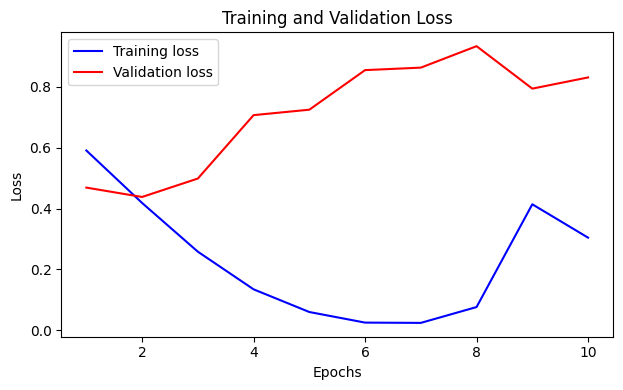

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()